In [51]:
import numpy as np
from scipy import interpolate


def ERDF(lambda_Edd, galaxy_type = 'Blue', seed=None):
    """
    ERDF for blue galaxies (radiatively-efficient, less massive)
    """
    # Lbr = 10**38.1 lambda_br M_BH_br
    # 10^41.67 = 10^38.1 * 10^x * 10^10.66
    if galaxy_type == 'Red':
        xi = 10**-2.13
        lambda_br = 10**np.random.normal(-2.81, np.mean([0.22, 0.14]))
        delta1 = np.random.normal(0.41-0.7, np.mean([0.02, 0.02])) # > -0.45 won't affect LF
        delta2 = np.random.normal(1.22, np.mean([0.19, 0.13]))
    
    if galaxy_type == 'Blue': 
        xi = 10**-1.65
        lambda_br = 10**np.random.normal(-1.84, np.mean([0.30, 0.37]))
        delta1 = np.random.normal(0.471-0.7, np.mean([0.02, 0.02])) # > -0.45 won't affect LF
        delta2 = np.random.normal(2.53, np.mean([0.68, 0.38]))

    # https://ui.adsabs.harvard.edu/abs/2019ApJ...883..139S/abstract
    # What sets the break? Transfer from radiatively efficient to inefficient accretion?

    # parameters from this paper:
    # https://iopscience.iop.org/article/10.3847/1538-4357/aa803b/pdf
    print('(lambda_Edd/lambda_br)**delta1:\n',(lambda_Edd/lambda_br)**delta1)
    return xi * ((lambda_Edd/lambda_br)**delta1 + (lambda_Edd/lambda_br)**delta2)**-1 

#based on Colin's
def inv_trans_sampling(x, y, sampling_size = 1000):
    #y is the pdf of x
    dx = np.diff(x)
    cum_values = np.zeros(x.shape)
    cum_values[1:] = np.cumsum(y*dx)/np.sum(y*dx)

    r = np.random.rand(int(sampling_size))
    return np.interp(r, cum_values, x)

#based on web (not currently used)
def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [96]:
# parameter adopted from colin's notebook
log_lambda_min = -8.5
log_lambda_max = 0.5
nbins = 1000
lambda_ = np.logspace(log_lambda_min, log_lambda_max, nbins+1) 
dlambda = np.diff(lambda_)  #size of each bin
#dloglambda = np.diff(np.log10(lambda_)) #not used so far
lambda_Edd = lambda_[:-1] + dlambda/2  #middle point of each bin?  #Colin uses lambda_Edd = lambda_[1:] + dlambda/2


In [97]:
xi_blue = ERDF(lambda_Edd) #xi_blue = ERDF(np.log10(lambda_Edd)) ?
#using colin's
sampling = inv_trans_sampling(lambda_, xi_blue, 1000)

(lambda_Edd/lambda_br)**delta1:
 [25.19040706 25.09029589 24.99058259 24.89126556 24.79234324 24.69381405
 24.59567643 24.49792883 24.4005697  24.30359748 24.20701066 24.11080768
 24.01498704 23.9195472  23.82448666 23.7298039  23.63549744 23.54156576
 23.44800738 23.35482082 23.2620046  23.16955725 23.0774773  22.9857633
 22.89441378 22.8034273  22.71280242 22.62253769 22.5326317  22.443083
 22.35389019 22.26505185 22.17656657 22.08843294 22.00064957 21.91321507
 21.82612805 21.73938713 21.65299093 21.56693809 21.48122723 21.39585701
 21.31082606 21.22613304 21.14177661 21.05775542 20.97406815 20.89071346
 20.80769005 20.72499658 20.64263175 20.56059425 20.47888279 20.39749606
 20.31643277 20.23569165 20.15527141 20.07517077 19.99538846 19.91592323
 19.8367738  19.75793892 19.67941736 19.60120784 19.52330915 19.44572004
 19.36843929 19.29146566 19.21479794 19.13843491 19.06237536 18.98661808
 18.91116188 18.83600555 18.76114791 18.68658776 18.61232393 18.53835524
 18.46468052 18.39129

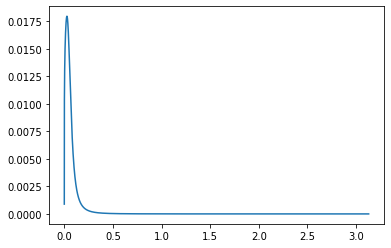

In [99]:
import matplotlib.pyplot as plt
plt.plot(lambda_Edd, xi_blue)

(array([ 7.67393795, 12.78989659, 10.67042801, 10.45117264,  7.96627845,
         5.84680987,  4.60436277,  2.77723469,  1.90021321,  1.90021321,
         1.2424471 ,  0.9501066 ,  0.65776611,  0.21925537,  0.29234049,
         0.58468099,  0.51159586,  0.14617025,  0.14617025,  0.        ,
         0.29234049,  0.14617025,  0.14617025,  0.07308512,  0.14617025,
         0.07308512,  0.07308512,  0.07308512,  0.07308512,  0.        ,
         0.14617025,  0.07308512,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07308512,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07308512,
         0.        ,  0.        ,  0.        ,  0. 

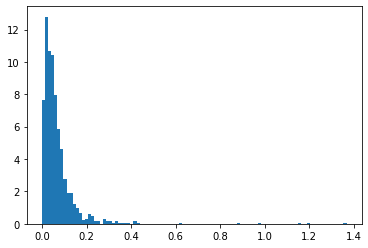

In [98]:
plt.hist(sampling, bins=100, density=True)

In [73]:
lambda_

array([3.16227766e-09, 8.91250938e-09, 2.51188643e-08, 7.07945784e-08,
       1.99526231e-07, 5.62341325e-07, 1.58489319e-06, 4.46683592e-06,
       1.25892541e-05, 3.54813389e-05, 1.00000000e-04, 2.81838293e-04,
       7.94328235e-04, 2.23872114e-03, 6.30957344e-03, 1.77827941e-02,
       5.01187234e-02, 1.41253754e-01, 3.98107171e-01, 1.12201845e+00,
       3.16227766e+00])

In [74]:
lambda_Edd

array([6.03739352e-09, 1.70156868e-08, 4.79567214e-08, 1.35160405e-07,
       3.80933778e-07, 1.07361726e-06, 3.02586456e-06, 8.52804502e-06,
       2.40352965e-05, 6.77406695e-05, 1.90919147e-04, 5.38083264e-04,
       1.51652469e-03, 4.27414729e-03, 1.20461838e-02, 3.39507587e-02,
       9.56862389e-02, 2.69680463e-01, 7.60062812e-01, 2.14214806e+00])

In [66]:
np.logspace(1, 10, 10) 

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [71]:
lambda_

array([3.16227766e-09, 8.91250938e-09, 2.51188643e-08, 7.07945784e-08,
       1.99526231e-07, 5.62341325e-07, 1.58489319e-06, 4.46683592e-06,
       1.25892541e-05, 3.54813389e-05, 1.00000000e-04, 2.81838293e-04,
       7.94328235e-04, 2.23872114e-03, 6.30957344e-03, 1.77827941e-02,
       5.01187234e-02, 1.41253754e-01, 3.98107171e-01, 1.12201845e+00,
       3.16227766e+00])

In [69]:
dlambda

array([5.75023172e-09, 1.62063549e-08, 4.56757141e-08, 1.28731653e-07,
       3.62815094e-07, 1.02255187e-06, 2.88194273e-06, 8.12241820e-06,
       2.28920848e-05, 6.45186611e-05, 1.81838293e-04, 5.12489942e-04,
       1.44439290e-03, 4.07085231e-03, 1.14732207e-02, 3.23359293e-02,
       9.11350311e-02, 2.56853416e-01, 7.23911284e-01, 2.04025921e+00])